In [15]:
#基于lcsm包
library("lcsm")
DATA = DATA = read.csv("DATA.csv")

[1] 300  13

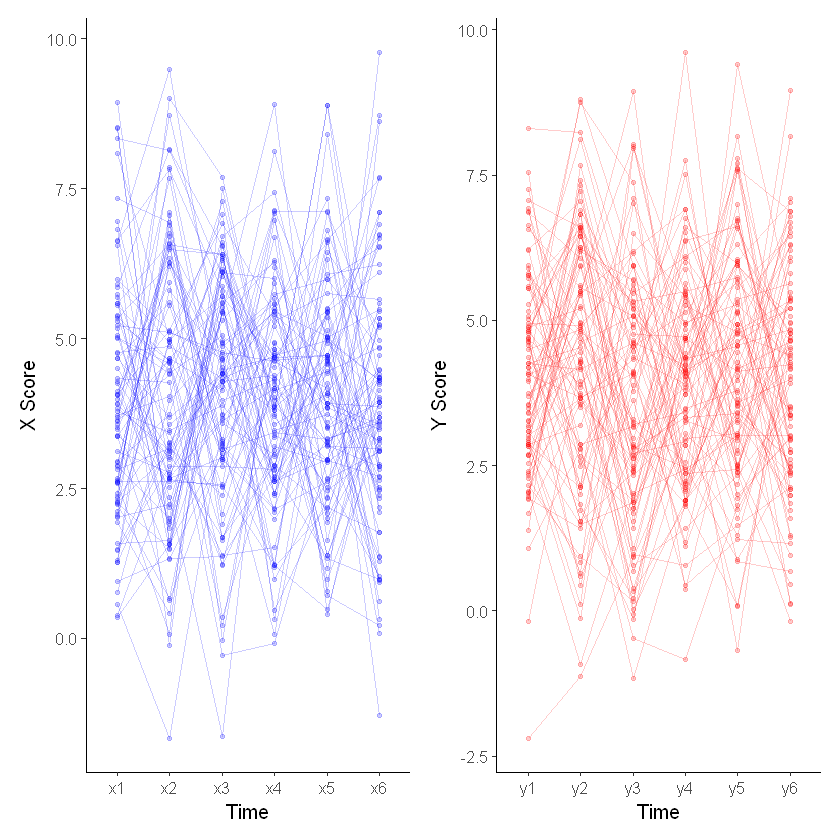

In [16]:
##########################可视化##############
#设置随机种子，随机抽取300个样本
set.seed(2010800607)
DATA1 <- dplyr::sample_n(DATA,300)
dim(DATA1)
plot_x <- plot_trajectories(data = DATA1,
                            id_var = "id", 
                            var_list = c("x1", "x2", "x3", "x4", "x5", "x6"),
                            xlab = "Time", ylab = "X Score",
                            connect_missing = FALSE, 
                            random_sample_frac = 0.3,
                            point_colour = "blue",
                            line_colour = "blue")

plot_y <- plot_trajectories(data = DATA1,
                            id_var = "id", 
                            var_list = c("y1", "y2", "y3", "y4", "y5","y6"),
                            xlab = "Time", ylab = "Y Score",
                            connect_missing = FALSE, 
                            random_sample_frac = 0.3,
                            point_colour = "red",
                            line_colour = "red")
library(patchwork)
plot_x + plot_y# + plot_annotation(tag_levels = 'A')

Warning message in lav_object_post_check(object):
"lavaan WARNING: covariance matrix of latent variables
                is not positive definite;
                use lavInspect(fit, "cov.lv") to investigate."


lavaan 0.6-12 ended normally after 72 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        15
  Number of equality constraints                     8

  Number of observations                          1869
  Number of missing patterns                         1

Model Test User Model:
                                              Standard      Robust
  Test Statistic                                10.787      10.272
  Degrees of freedom                                20          20
  P-value (Chi-square)                           0.952       0.963
  Scaling correction factor                                  1.050
    Yuan-Bentler correction (Mplus variant)                       

# Specify latent true scores 
lx1 =~ 1 * x1 
lx2 =~ 1 * x2 
lx3 =~ 1 * x3 
lx4 =~ 1 * x4 
lx5 =~ 1 * x5 
lx6 =~ 1 * x6 
# Specify mean of latent true scores 
lx1 ~ gamma_lx1 * 1 
lx2 ~ 0 * 1 
lx3 ~ 0 * 1 
lx4 ~ 0 * 1 
lx5 ~ 0 * 1 
lx6 ~ 0 * 1 
# Specify variance of latent true scores 
lx1 ~~ sigma2_lx1 * lx1 
lx2 ~~ 0 * lx2 
lx3 ~~ 0 * lx3 
lx4 ~~ 0 * lx4 
lx5 ~~ 0 * lx5 
lx6 ~~ 0 * lx6 
# Specify intercept of obseved scores 
x1 ~ 0 * 1 
x2 ~ 0 * 1 
x3 ~ 0 * 1 
x4 ~ 0 * 1 
x5 ~ 0 * 1 
x6 ~ 0 * 1 
# Specify variance of observed scores 
x1 ~~ sigma2_ux * x1 
x2 ~~ sigma2_ux * x2 
x3 ~~ sigma2_ux * x3 
x4 ~~ sigma2_ux * x4 
x5 ~~ sigma2_ux * x5 
x6 ~~ sigma2_ux * x6 
# Specify autoregressions of latent variables 
lx2 ~ 1 * lx1 
lx3 ~ 1 * lx2 
lx4 ~ 1 * lx3 
lx5 ~ 1 * lx4 
lx6 ~ 1 * lx5 
# Specify latent change scores 
dx2 =~ 1 * lx2 
dx3 =~ 1 * lx3 
dx4 =~ 1 * lx4 
dx5 =~ 1 * lx5 
dx6 =~ 1 * lx6 
# Specify latent change scores means 
dx2 ~ 0 * 1 
dx3 ~ 0 * 1 
dx4 ~ 0 * 1 
dx5 ~ 0 * 1 
dx6

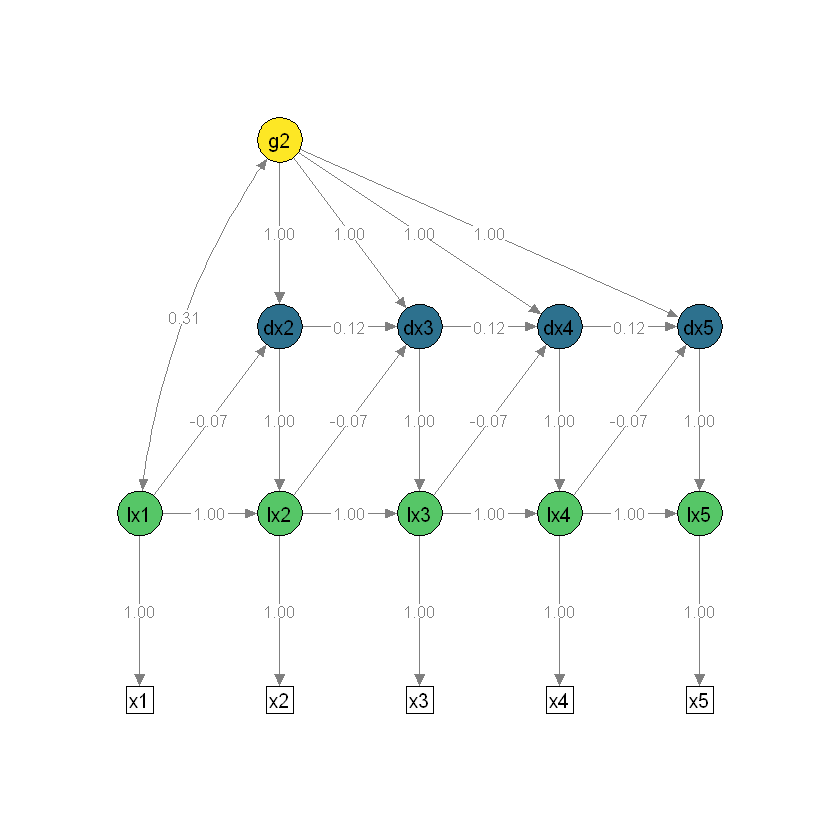

In [17]:

##############################拟合单变量###
fit_uni_lcsm(data = DATA, 
             var =  c("x1", "x2", "x3", "x4", "x5","x6"),
             model = list(alpha_constant = TRUE, 
                          beta = FALSE, 
                          phi = TRUE))
syntax <- fit_uni_lcsm(data = DATA, 
                     var =  c("x1", "x2", "x3", "x4", "x5","x6"),
                     model = list(alpha_constant = TRUE, 
                                  beta = FALSE, 
                                  phi = TRUE),
                     return_lavaan_syntax = TRUE)
cat(syntax)
uni_lavaan_syntax <- fit_uni_lcsm(data = data_uni_lcsm, 
                                  var = c("x1", "x2", "x3", "x4", "x5"),
                                  model = list(alpha_constant = TRUE, 
                                               beta = TRUE, 
                                               phi = TRUE),
                                  return_lavaan_syntax = TRUE)
#可视化
plot_lcsm(lavaan_object = uni_lavaan_results,
          lavaan_syntax = uni_lavaan_syntax,
          edge.label.cex = .9,  
          lcsm_colours = TRUE,
          lcsm = "univariate")

lavaan 0.6-12 ended normally after 121 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        55
  Number of equality constraints                    33

  Number of observations                           500
  Number of missing patterns                        85

Model Test User Model:
                                              Standard      Robust
  Test Statistic                                74.983      77.217
  Degrees of freedom                                68          68
  P-value (Chi-square)                           0.262       0.208
  Scaling correction factor                                  0.971
    Yuan-Bentler correction (Mplus variant)                       



|label        | estimate| std.error| statistic|p.value | std.lv| std.all|
|:------------|--------:|---------:|---------:|:-------|------:|-------:|
|gamma_lx1    |    4.084|     0.099|    41.056|< .001  |     NA|      NA|
|sigma2_lx1   |   -0.286|     0.353|    -0.811|.417    |     NA|      NA|
|sigma2_ux    |    4.076|     0.156|    26.088|< .001  |  4.076|   1.076|
|alpha_g2     |    6.165|     2.898|     2.127|.033    | 27.911|  27.911|
|sigma2_g2    |    0.049|     0.163|     0.298|.765    |  1.000|   1.000|
|sigma_g2lx1  |    0.045|     0.141|     0.316|.752    |  0.377|   0.377|
|beta_x       |   -1.469|     0.272|    -5.394|< .001  |     NA|      NA|
|gamma_ly1    |    3.987|     0.067|    59.718|< .001  | 16.436|  16.436|
|sigma2_ly1   |    0.059|     0.085|     0.689|.491    |  1.000|   1.000|
|sigma2_uy    |    4.036|     0.251|    16.060|< .001  |  4.036|   0.986|
|alpha_j2     |   18.140|     8.176|     2.219|.027    | 17.528|  17.528|
|sigma2_j2    |    1.071|     1.514|

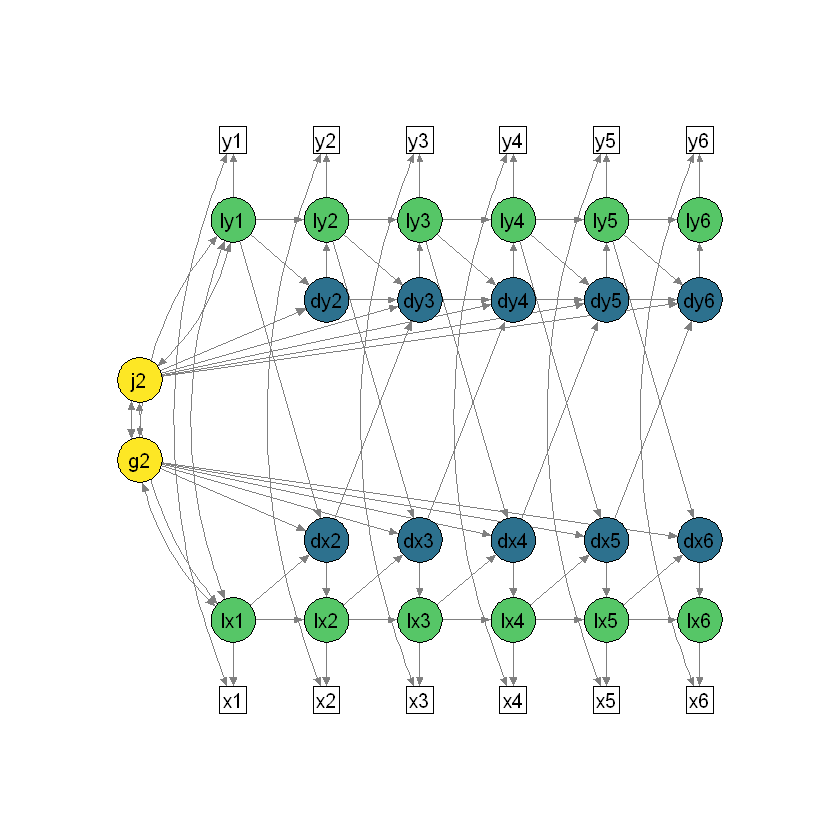

In [18]:

###############################拟合双变量##
fit_bi_lcsm(data = data_bi_lcsm, 
            var_x = c("x1", "x2", "x3", "x4", "x5","x6"),
            var_y = c("y1", "y2", "y3", "y4", "y5","y6"),
            model_x = list(alpha_constant = TRUE, 
                           beta = TRUE, 
                           phi = FALSE),
            model_y = list(alpha_constant = TRUE, 
                           beta = TRUE, 
                           phi = TRUE),
            coupling = list(delta_lag_xy = TRUE, 
                            xi_lag_yx = TRUE))
library("knitr")
param_bi_lcsm_01 <- extract_param(bi_lcsm_01, printp = TRUE)[ , 1:7]
kable(param_bi_lcsm_01, digits = 3)
bi_lavaan_syntax <- fit_bi_lcsm(data = data_bi_lcsm, 
                                var_x = c("x1", "x2", "x3", "x4", "x5","x6"),
                                var_y = c("y1", "y2", "y3", "y4", "y5","y6"),
                                model_x = list(alpha_constant = TRUE, 
                                               beta = TRUE, 
                                               phi = FALSE),
                                model_y = list(alpha_constant = TRUE, 
                                               beta = TRUE, 
                                               phi = TRUE),
                                coupling = list(delta_lag_xy = TRUE, 
                                                xi_lag_yx = TRUE),
                                return_lavaan_syntax = TRUE)


plot_lcsm(lavaan_object = bi_lavaan_results, 
          lavaan_syntax = bi_lavaan_syntax,
          lcsm_colours = TRUE,
          whatLabels = "hide",
          lcsm = "bivariate")